In [1]:
import gzip

In [47]:
# Feature Extractions
with gzip.open('finefoods.txt.gz', 'rt', encoding='latin-1') as f:
    fields = ['product/productId', 
              'review/userId', 
              'review/profileName', 
              'review/helpfulness',
              'review/score',
              'review/time',
              'review/summary',
              'review/text']
    
    text_csv = []
    curr_review = []
    
    for idx, line in enumerate(f):
        if line == '\n':
            text_csv.append(curr_review)
            curr_review = []
            continue

        try:
            colon = line.index(':')
            field, value = line[:colon], line[colon+1:].strip()
            curr_review.append(value)
        except:
            curr_review[-1] += '\n' + line
            print(curr_review[-1])

MABEL "Tell us about yourself!
88 years old. ...

Don Snyder "The Idea Guy
...creative powers b...

Sherry "Tell us about yourself!
School Princi...

Sherry "Tell us about yourself!
School Princi...

J. Facey "J.F., CA
I am a voracious reader/li...

Sherry "Tell us about yourself!
School Princi...

Don Snyder "The Idea Guy
...creative powers b...



In [49]:
import csv

with open('finefoods.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    csv_writer.writerow(fields)
    
    csv_writer.writerows(text_csv)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set('notebook',
        font_scale=1.5,
        rc={'figure.figsize': (12, 6)})
sns.set_style('darkgrid')

In [2]:
reviews = pd.read_csv('finefoods.csv.gz',
                      compression='gzip')

In [3]:
matrix = reviews[['review/userId', 'product/productId', 'review/score']]
matrix = matrix.rename(columns={'review/userId': 'userId',
                       'product/productId': 'itemId',
                       'review/score': 'rating'})
matrix

userId      itemId  rating
0       A3SGXH7AUHU8GW  B001E4KFG0     5.0
1       A1D87F6ZCVE5NK  B00813GRG4     1.0
2        ABXLMWJIXXAIN  B000LQOCH0     4.0
3       A395BORC6FGVXV  B000UA0QIQ     2.0
4       A1UQRSCLF8GW1T  B006K2ZZ7K     5.0
...                ...         ...     ...
568449  A28KG5XORO54AY  B001EO7N10     5.0
568450  A3I8AFVPEE8KI5  B003S1WTCU     2.0
568451  A121AA1GQV751Z  B004I613EE     5.0
568452   A3IBEVCTXKNOH  B004I613EE     5.0
568453  A3LGQPJCZVL9UC  B001LR2CU2     5.0

[568454 rows x 3 columns]

In [29]:
matrix['userId'].nunique()

256059

In [30]:
user_review_counts = (matrix.groupby('userId')
                            .count()
                            .sort_values('rating', ascending=False)['rating'])

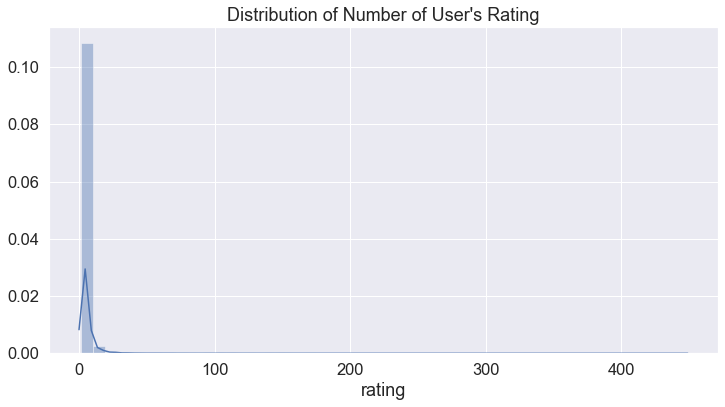

In [31]:
sns.distplot(user_review_counts)
plt.title('Distribution of Number of User\'s Rating');

In [77]:
matrix['itemId'].nunique()

74258

In [83]:
item_review_counts = (matrix.groupby('itemId')
                            .count()
                            .sort_values('rating', ascending=False)['rating'])

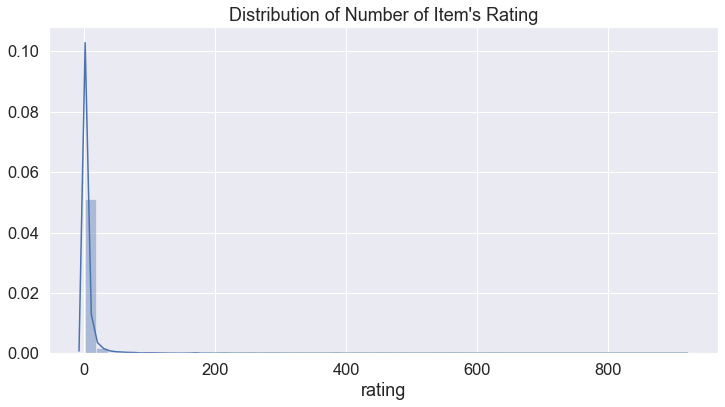

In [100]:
sns.distplot(item_review_counts)
plt.title('Distribution of Number of Item\'s Rating');

In [73]:
matrix['rating'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

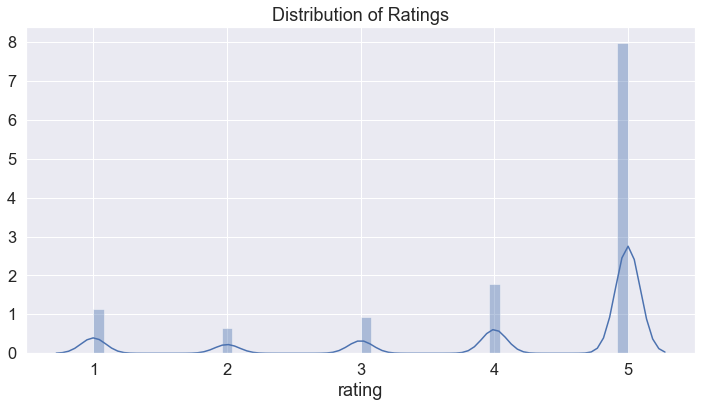

In [38]:
sns.distplot(matrix['rating'])

plt.title('Distribution of Ratings');

#### Matrix Factorization

In [7]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
import numpy as np

In [8]:
# Random seed

np.random.seed(42)

In [9]:
# parse file containing the ratings
reader = Reader(rating_scale=(1, 5))
# surprise base class dataset
data = Dataset.load_from_df(matrix[['userId', 'itemId', 'rating']], reader)

In [7]:
from surprise import BaselineOnly

In [142]:
algo = BaselineOnly()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1632  1.1662  1.1697  1.1725  1.1737  1.1691  0.0039  
MAE (testset)     0.8984  0.9012  0.9027  0.9055  0.9055  0.9027  0.0027  
Fit time          2.86    3.18    2.84    2.74    2.74    2.87    0.16    
Test time         0.73    0.80    0.66    1.76    0.65    0.92    0.42    


In [8]:
from surprise import SVD

In [144]:
algo = SVD()
cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0817  1.0768  1.0874  1.0829  1.0829  1.0823  0.0034  
MAE (testset)     0.7874  0.7866  0.7920  0.7885  0.7902  0.7889  0.0020  
Fit time          30.81   30.92   30.92   31.04   30.83   30.90   0.08    
Test time         0.92    0.90    0.90    0.92    0.90    0.91    0.01    


In [9]:
from surprise import NMF

In [146]:
algo = NMF()
cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1449  1.1567  1.1448  1.1492  1.1484  1.1488  0.0043  
MAE (testset)     0.8174  0.8254  0.8159  0.8170  0.8189  0.8189  0.0034  
Fit time          59.11   57.38   56.98   57.34   57.15   57.59   0.77    
Test time         0.88    1.94    0.86    0.84    0.85    1.07    0.44    


In [1]:
# from surprise import KNNWithMeans

In [2]:
# Not enough memory to run, might have to look towards AWS solutions
# sim_options = {'user_based': False}
# algo = KNNWithMeans(k=25, sim_options=sim_options)
# cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True);

#### Hyperparameter search on SVD

In [10]:
from surprise.model_selection import RandomizedSearchCV

In [11]:
param_grid = {'n_epochs': range(10, 20),
              'lr_all': np.linspace(2e-3, 5e-3, num=5),
              'reg_all': np.linspace(1e-2, 3e-2, num=5)}

rs = RandomizedSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

rs.fit(data)

In [12]:
print(rs.best_score['rmse'])
rs.best_params['rmse']

1.1252060432385296


{'n_epochs': 17, 'lr_all': 0.005, 'reg_all': 0.019999999999999997}

#### Train on full dataset for prediction

In [15]:
algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)

In [26]:
uid, iid, rating = matrix.loc[0, :].values

In [27]:
pred = algo.predict(uid, iid, r_ui=5, verbose=True)

user: A3SGXH7AUHU8GW item: B001E4KFG0 r_ui = 5.00   est = 4.42   {'was_impossible': False}
